In [43]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

df = pd.read_csv("C:\\Users\\irosh\\Downloads\\Fraud.csv\\Fraud.csv")


In [44]:
#basic statistical analysis 

print("First 5 rows of the dataset")
print(df.head(5))

print("Information about the dataset")
print(df.info())

print("Statistical description of the dataset")
print(df.describe())

First 5 rows of the dataset
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [45]:
#checking for missing values
missing_values = df.isnull().sum()

# Displaying the count of missing values for each column
print("Missing Values:\n", missing_values)


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [46]:
df_cleaned = df.dropna()

# Encoding categorical variable 'type'
df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)

# Displaying the updated dataset
print(df_cleaned.head())

   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0             0.0             0.0        0               0          False   
1             0.0             0.0        0               0          False   
2             0.0             0.0        1               0          False   
3         21182.0             0.0        1               0           True   
4             0.0             0.0        0               0          False   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0       False          

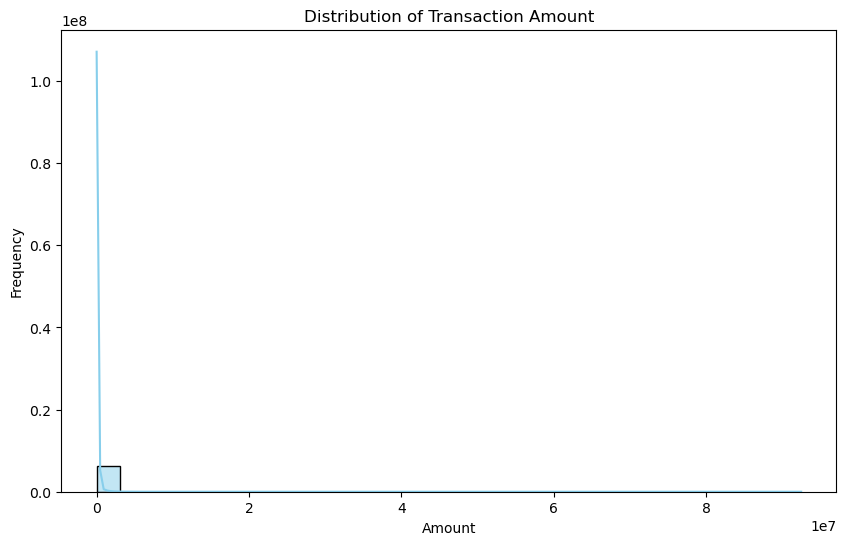

In [47]:
#EDA 

# Univariate Analysis

# Distribution of 'amount'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


- Distribution of transactional Amount Graph visually shows that the majority of transactions are of relatively low amounts. 

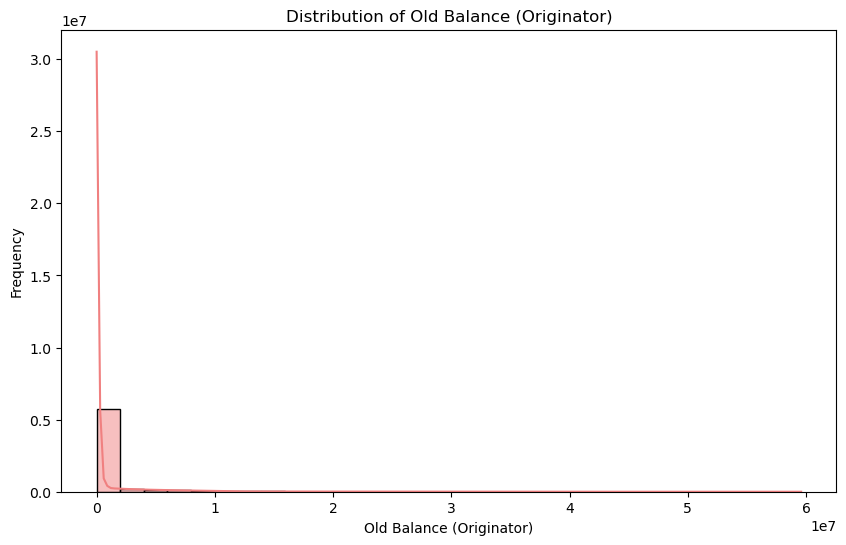

In [48]:
#Distribution of 'oldbalanceOrg'

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['oldbalanceOrg'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Old Balance (Originator)')
plt.xlabel('Old Balance (Originator)')
plt.ylabel('Frequency')
plt.show()


- Distribution of old balance graph shows that many originators had relatively low old balances

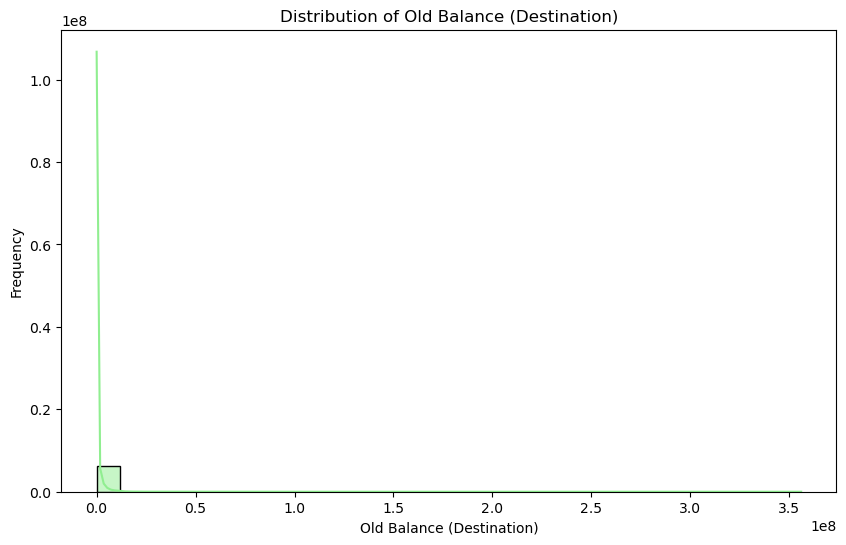

In [49]:
#Distribution of 'oldbalanceDest'

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['oldbalanceDest'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Old Balance (Destination)')
plt.xlabel('Old Balance (Destination)')
plt.ylabel('Frequency')
plt.show()

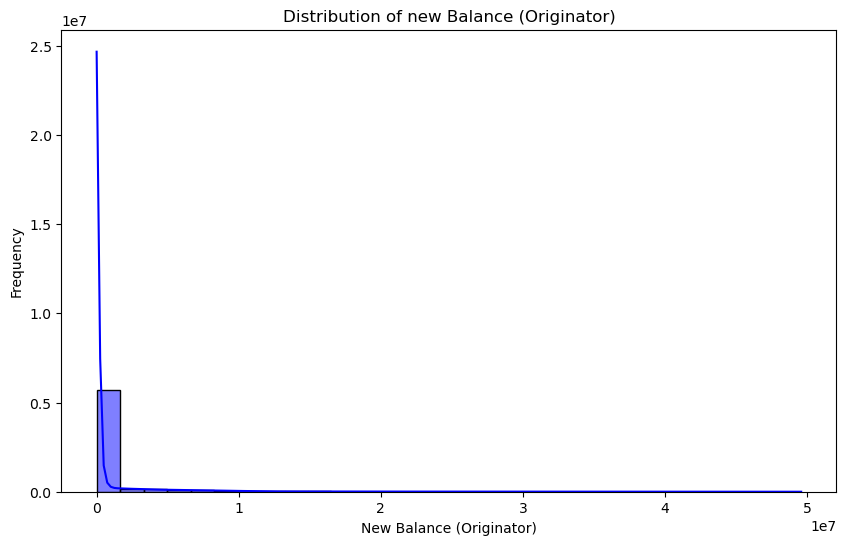

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['newbalanceOrig'], bins=30, kde=True, color='blue')
plt.title('Distribution of new Balance (Originator)')
plt.xlabel('New Balance (Originator)')
plt.ylabel('Frequency')
plt.show()


- Distribution of New Balance originator shows many originators have relatively low new balances.

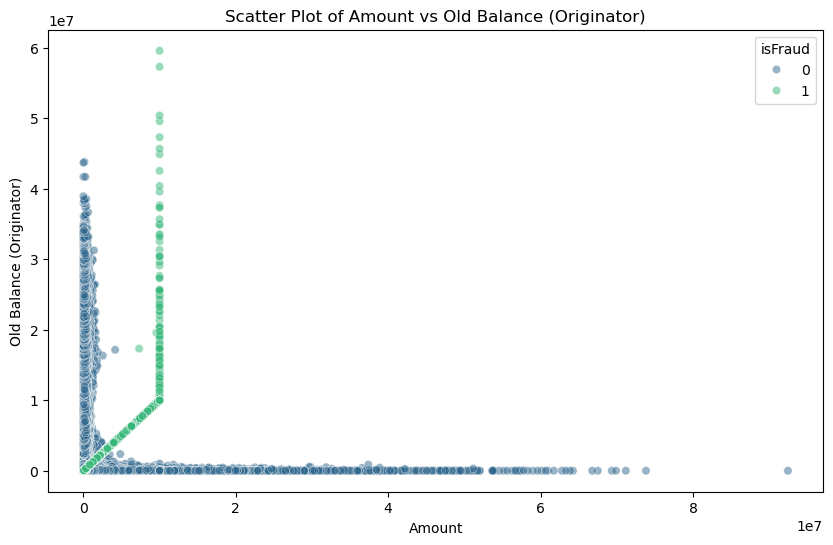

In [51]:
#bivariate analysis

# Scatter plot of 'amount' vs 'oldbalanceOrg'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='oldbalanceOrg', data=df_cleaned, hue='isFraud', palette='viridis', alpha=0.5)
plt.title('Scatter Plot of Amount vs Old Balance (Originator)')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Originator)')
plt.show()

- Blue dots are scattered throughout, showing variation in both amount and old balance.
- Green dots appear in vertical lines, indicating that fraud is often associated with specific amounts.

The relationship between transaction amounts and old balances, with distinct patterns for fraudulent and non-fraudulent transactions.

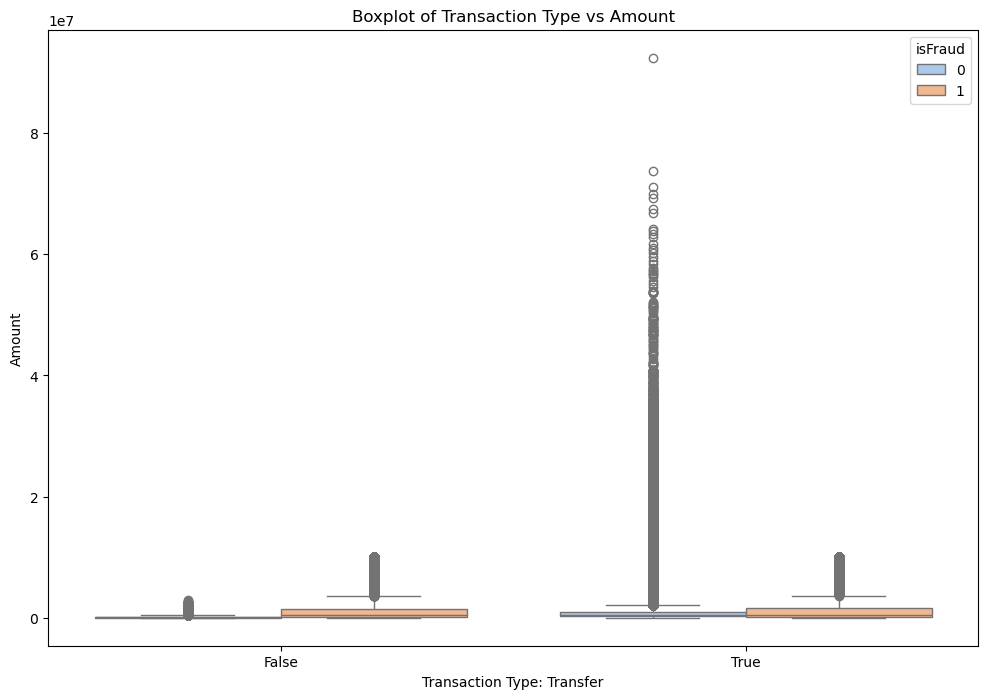

In [52]:
# Boxplot of transaction type vs amount
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='type_TRANSFER', y='amount', hue='isFraud', palette='pastel')
plt.title('Boxplot of Transaction Type vs Amount')
plt.xlabel('Transaction Type: Transfer')
plt.ylabel('Amount')
plt.show()


- Non-fraudulent transactions tend to involve smaller amounts of money.

- Fraudulent transactions have a wider range of amounts, including some very high values.

- Higher transaction amounts are more likely to be associated with fraud when it comes to transfers.

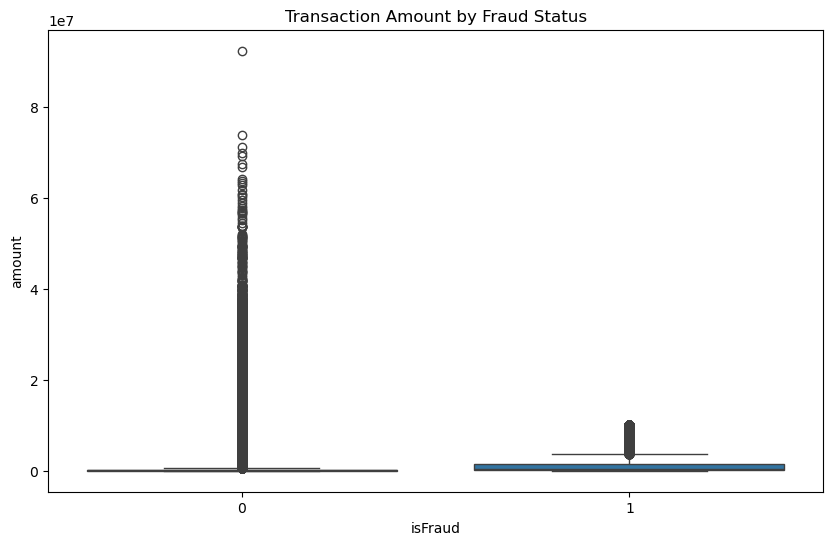

In [53]:
#Fraud vs. Non-Fraud Analysis

# Boxplot for transaction amount by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df_cleaned)
plt.title('Transaction Amount by Fraud Status')
plt.show()





*Non-Fraudulent Transactions (isFraud = 0):*

- There is a wide range of transaction amounts for non-fraudulent transactions.
- Some non-fraudulent transactions have very high amounts.

*Fraudulent Transactions (isFraud = 1):*

- Fraudulent transactions are fewer in number.
- Most fraudulent transactions have lower amounts and are clustered near the bottom of the y-axis.


fraudulent transactions tend to be smaller in amount compared to non-fraudulent transactions.

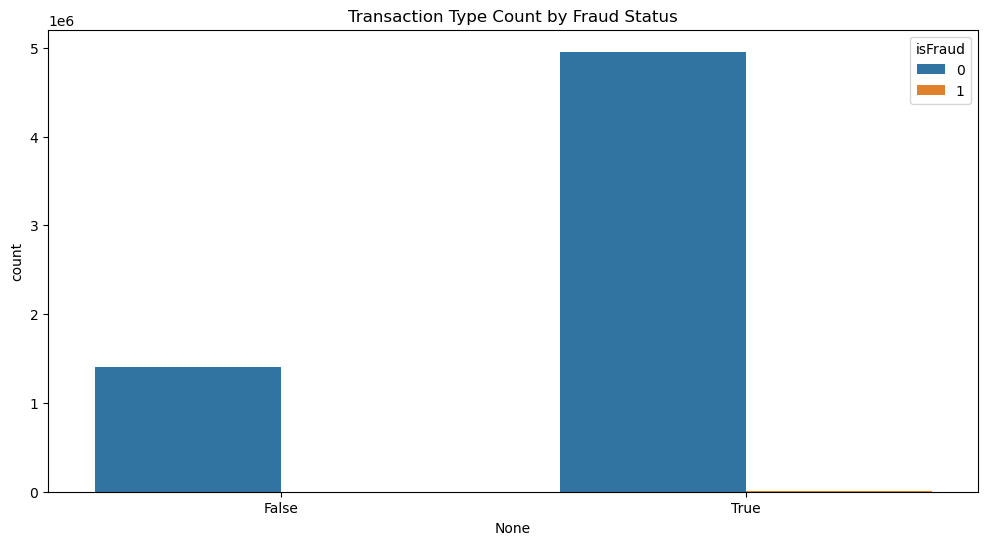

In [54]:
# Countplot for transaction type by fraud status
plt.figure(figsize=(12, 6))
sns.countplot(x=df_cleaned['type_CASH_OUT'] | df_cleaned['type_DEBIT'] | df_cleaned['type_PAYMENT'] | df_cleaned['type_TRANSFER'],
              hue='isFraud', data=df_cleaned)
plt.title('Transaction Type Count by Fraud Status')
plt.show()

- Under the category “False”, there is a small blue bar, indicating a smaller number of transactions where no fraud was detected.

- Under the category “True”, there is a large blue bar, representing a high number of transactions where no fraud was detected. Notably, there is no orange bar here, indicating that none of these transactions were marked as fraudulent.

- There is no bar under the category “None”, suggesting that zero transactions were unclassified or undetermined in terms of fraud status.

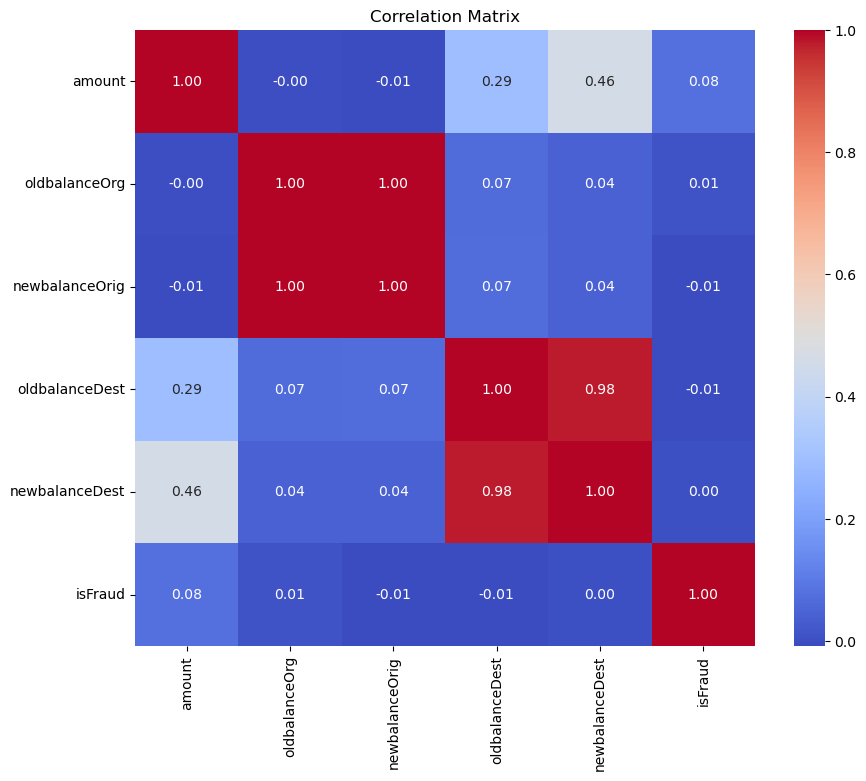

In [55]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataframe for analysis
df_analysis = df_cleaned.copy()

# Label encoding object columns
label_encoder = LabelEncoder()
for column in df_analysis.columns:
    if df_analysis[column].dtype == 'object':
        df_analysis[column] = label_encoder.fit_transform(df_analysis[column])

# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_analysis[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


 *Amount:*

- The variable amount shows a weak positive correlation with newbalanceOrig and newbalanceDest. This suggests that as the transaction amount increases, the new balances in the origin and destination accounts tend to increase slightly.
- There is no significant correlation between amount and oldbalanceOrg or oldbalanceDest.
 
 
 *Old Balances (oldbalanceOrg and oldbalanceDest):*

- oldbalanceOrg has a strong positive correlation with newbalanceOrig. This indicates that when the initial balance in the origin account is higher, the new balance after the transaction tends to be higher as well.
- Similarly, oldbalanceDest has a strong positive correlation with newbalanceDest. When the initial balance in the destination account is higher, the new balance after the transaction tends to be higher too.

*Fraud Indicator (isFraud):*

- The variable isFraud shows very weak correlations with other variables. This suggests that the occurrence of fraud (as indicated by isFraud) is not strongly related to the transaction amount or the balances in the accounts.


However, the occurrence of fraud appears to be independent of these other factors.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sampling a smaller portion of data for testing. 
sample_size = 50000                         #this was necessary as it's a large dataset which was not getting executed because of the size of data
df_sample = df_cleaned.sample(sample_size, random_state=42)

# Feature Engineering
#Extracting 'day' and 'hour' from 'step' column
df_sample['day'] = df_sample['step'] // 24
df_sample['hour'] = df_sample['step'] % 24

# Selecting relevant columns for the feature set
selected_columns = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
    'day', 'hour'
]

# Addressing Class Imbalance using SMOTE
X = df_sample[selected_columns]  # Features
y = df_sample['isFraud']  # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Spliting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Random Forest fine-tuning with RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                                      rf_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

# Displaying the best hyperparameters for Random Forest
print("Random Forest - Best Hyperparameters:", rf_random_search.best_params_)

# XGBoost fine-tuning with RandomizedSearchCV
xgb_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_random_search = RandomizedSearchCV(XGBClassifier(random_state=42, use_label_encoder=False),
                                       xgb_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
xgb_random_search.fit(X_train_scaled, y_train)

# Displaying the best hyperparameters for XGBoost
print("XGBoost - Best Hyperparameters:", xgb_random_search.best_params_)

# Evaluating Tuned Random Forest Model
rf_tuned_model = rf_random_search.best_estimator_
rf_predictions = rf_tuned_model.predict(X_val_scaled)

# Evaluating Tuned XGBoost Model
xgb_tuned_model = xgb_random_search.best_estimator_
xgb_predictions = xgb_tuned_model.predict(X_val_scaled)

# Comparing model performances on validation set
print("\nRandom Forest - Evaluation Metrics:")
print(classification_report(y_val, rf_predictions))

print("\nXGBoost - Evaluation Metrics:")
print(classification_report(y_val, xgb_predictions))

# Selecting the best model based on best score
best_model = rf_tuned_model if rf_random_search.best_score_ > xgb_random_search.best_score_ else xgb_tuned_model

# Final Model Training on the entire training set
best_model.fit(X_train_scaled, y_train)

# Evaluating on Unseen Data (Test Set)
final_predictions = best_model.predict(X_test_scaled)
print("\nFinal Model Evaluation on Test Set:")
print(classification_report(y_test, final_predictions))


Random Forest - Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
XGBoost - Best Hyperparameters: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}

Random Forest - Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10003
           1       1.00      1.00      1.00      9969

    accuracy                           1.00     19972
   macro avg       1.00      1.00      1.00     19972
weighted avg       1.00      1.00      1.00     19972


XGBoost - Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10003
           1       1.00      1.00      1.00      9969

    accuracy                           1.00     19972
   macro avg       1.00      1.00      1.00     19972
weighted avg       1.00      1.00      1.00     19972


Final Model Evaluation on Test Set:
              precision 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False)
}

# Evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)

    # Making predictions on the testing set
    y_pred = model.predict(X_test_scaled)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Printing results
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")



Model: Logistic Regression
Accuracy: 0.9837
Precision: 0.9918
Recall: 0.9752
F1-Score: 0.9834

Model: Support Vector Machine
Accuracy: 0.9790
Precision: 0.9896
Recall: 0.9679
F1-Score: 0.9786

Model: Decision Tree
Accuracy: 0.9987
Precision: 0.9983
Recall: 0.9991
F1-Score: 0.9987

Model: Random Forest
Accuracy: 0.9976
Precision: 0.9957
Recall: 0.9996
F1-Score: 0.9976

Model: XGBoost
Accuracy: 0.9994
Precision: 0.9988
Recall: 1.0000
F1-Score: 0.9994


In [58]:
# Determining the chosen model
if best_model == rf_tuned_model:
    print("The selected model is Random Forest.")
elif best_model == xgb_tuned_model:
    print("The selected model is XGBoost.")


The selected model is Random Forest.


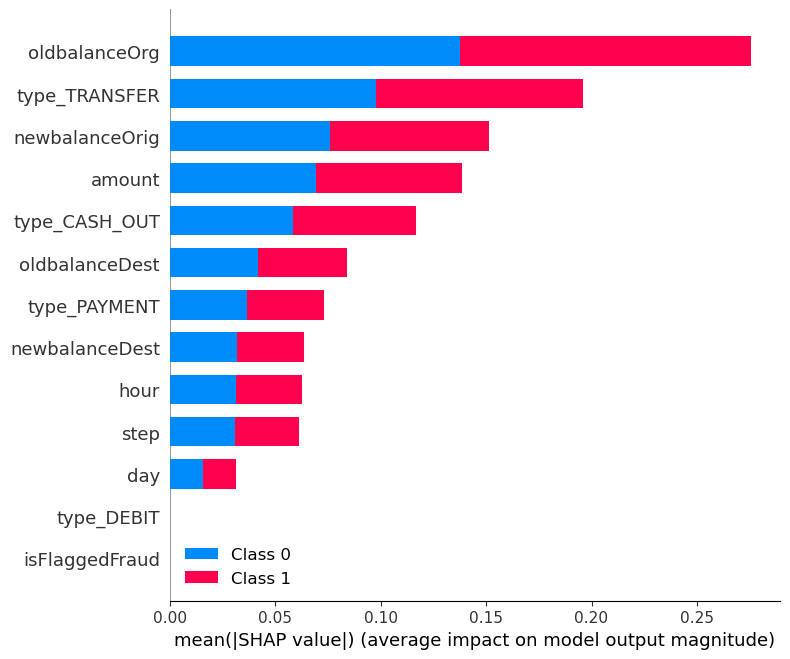

In [59]:
import shap

# Creating a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Fitting the model to your training data
rf_model.fit(X_train_scaled, y_train)

# Accessing the individual trees (estimators) in the forest
individual_trees = rf_model.estimators_

# Explaining the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)  # Using the Random Forest model
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


This plot provides an overview of the impact of each feature on the model's predictions for the test set.

In [60]:
from sklearn.metrics import confusion_matrix

y_pred_test = clf.predict(X_test_scaled)

# Evaluating the model on the test set
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Confusion Matrix:
 [[10004    41]
 [  155  9772]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10045
           1       1.00      0.98      0.99      9927

    accuracy                           0.99     19972
   macro avg       0.99      0.99      0.99     19972
weighted avg       0.99      0.99      0.99     19972



In [61]:
import joblib

joblib.dump(best_model, 'trained_model.joblib')

# Loading the serialized model
loaded_model = joblib.load('trained_model.joblib')